In [2]:
from random import seed
from random import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

ModuleNotFoundError: No module named 'keras'

In [5]:
# generate toy dataset
def generate_data (num_sample_class, dim, num_class):
    X = np.zeros((num_sample_class*num_class,dim)) # data matrix (each row = single example)
    y = np.zeros(num_sample_class*num_class, dtype='uint8') # class labels
    for j in range(num_class):
        ix = range(num_sample_class*j,num_sample_class*(j+1))
        r = np.linspace(0.0,1,num_sample_class) # radius
        t = np.linspace(j*4,(j+1)*4,num_sample_class) + np.random.randn(num_sample_class)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    # lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return X, y

In [ ]:
def model_fit(train_x, train_y, config):
    n_input = config[0]
    n_nodes = config[2]
    n_output = config[1]
    epoch = config[3]
    batch = config[4]
    # Define and Compile
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu'))
    model.add(Dense(n_output, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(train_x, train_y, epochs=epoch, batch_size=batch)
    return model

# predict with the fit model
def model_predict(model, testdata):
    Prediction = model.predict(testdata, verbose=0)
    return Prediction

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

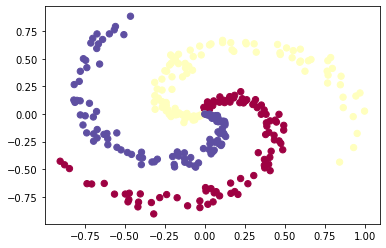

NameError: name 'train_test_split' is not defined

In [8]:
#example of how to use the ANN model

seed(1)
N = 100 # number of samples per class
D = 2 # dimensionality
K = 3 # number of classes
input_x, target_y =  generate_data (N, D, K)
train_x, test_x, train_y, test_y = train_test_split(input_x, target_y, test_size=0.20, random_state=42)

# encode the labels, 
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)

In [ ]:
config = [2, 3, 20, 100, 1]
neural_network = model_fit(train_x, train_y, config)

In [12]:
# Evaluate the model
prediction = model_predict(neural_network, test_x)

PredClass = list()
ActualClass = list()
for row in range(len(test_y)):
    index_maxscore1 = max(range(len(test_y[row])), key=test_y[row].__getitem__)
    ActualClass.append(index_maxscore1)
    index_maxscore2 = max(range(len(prediction[row])), key=prediction[row].__getitem__)
    PredClass.append(index_maxscore2)
    print('Expected=%d, Got=%d' % (index_maxscore1, index_maxscore2))


accuracy = accuracy_metric(PredClass, ActualClass)
accuracy

NameError: name 'neural_network' is not defined